In [1]:
import os
import sys
from pathlib import Path
path = str(Path(os.getcwd()).parent.parent)
sys.path.insert(0, path)

import Plotting as uplt

import matplotlib.pyplot as plt
import numpy as np

# before everything else call below function
# to change some of the default matplotlib configurations.
# for example, it changes the font-family, font-size, etc
# to make it consistent with latex.
uplt.rcSettings()

In [2]:
# I will plot 10 different lines
n_lines = 10
# so I create a list containing 10 colours
# sampled linearly spaced from cmap='viridis_r'
# default cmap of this function is viridis (_r just reverses)
# I used reversed as an example, but this function works with
# any matplotlib colour map. viridis is both sequential and
# colour-blind friendly. See docstrings for more.
colourcycle = uplt.colorCycle(n_lines, cmap='viridis_r')

# some x points to use in figures below
xvals = np.arange(0, 100, 0.1)

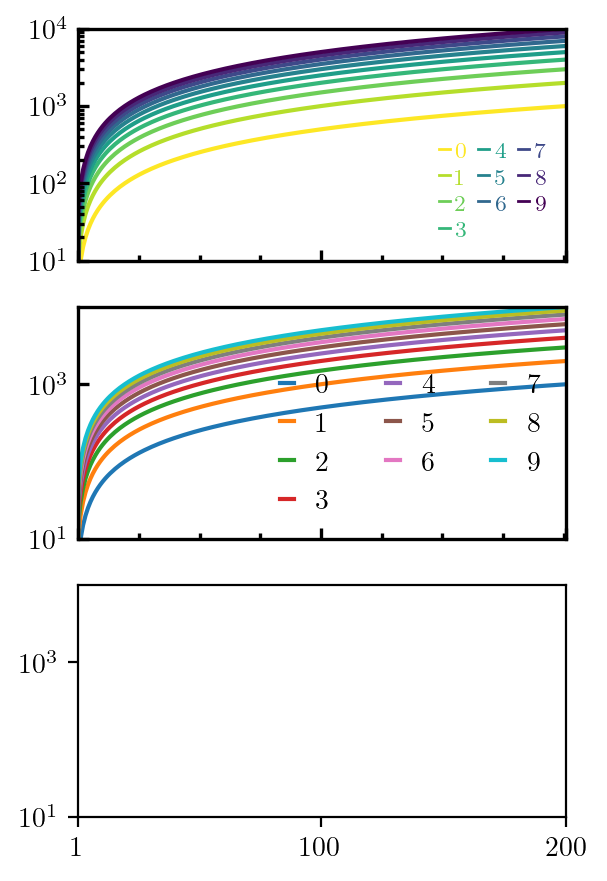

In [5]:
# create a figure (fig) that contain a list of axes (axlist)
# matplotlib uses inch, but this function accepts cm for width and heigth
# if you want to use inch see docstrings.
# width = 8 is suitable for single column figures,
# and 16 to 17 (maybe even up to 18) is suitable for full page width figures
# re-scaling figures in latex changes the font-size, so setting these
# dimensions correctly here makes sure that we have consist font-size
fig, axlist = uplt.createFigAndAx(width=8, height=13, rows=3, columns=1)

# next I plot what ever I need to plot
for i in range(n_lines):
    axlist[0].plot(10*xvals, 50*(i+1)*xvals, color=colourcycle[i], label=i)
# this one needs a legend, so I create a legend
# this function uses a different default configureation than matplotlib
# for example, it paints the label text with line colours, etc.
# but it can be used exactly as .legend(), which means that
# you can pass the same arguments to further modify the legend
uplt.createLegend(axlist[0], handlelength=0.5, loc='best')

# for comparison, below is using python default colour cycle
# also using the legend() method
for i in range(n_lines):
    axlist[1].plot(10*xvals, 50*(i+1)*xvals, label=i)
axlist[1].legend(ncol=3, loc='best',  handlelength=0.5)

# when we have list of axes, if their x and y ranges/limits are the same
# we can set them using below function, which loops over the list
uplt.setLimits(axlist, xlims=[1, 200], ylims=[10, 10000])
# maybe we also want to set the ticks of these manually
# we can use the below function to set the ticks
uplt.setTicks(axlist, xTicks=[1, 100, 200], yTicks=[10, 5000, 10000])
# if the sub-plots on a row/column share y/x limits and ticks
# we may want to omit the tick-labes to save white space
# that we may use for labels or titles, etc.
# below function removes the lables, but it requires number of
# rows and columns. Also, it assumes these limits are shared
# which might not be the case. So, use this cautiously
uplt.omitTicklabels(axlist, rows=3, columns=1)

# I like to change tick and axes grid styles
# for that I use axTickSettings function
# this style saves white space and also gives mathematica like
# look to figures
for ind, ax in enumerate(axlist):
    # change the style of all except last one for comparison
    if ind != 2:
        uplt.axTickSettings(ax)
    # When using log-scale, if you set it using matplotlib
    # method set_yscale, it does not always create sensible
    # ticks and minor-ticks, see below cases
    # setLogScale function avoids this.
    if ind == 0:
        uplt.setLogScale(ax, yLog=True)
    else:
        ax.set_yscale('log')